In [8]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import ipywidgets
import tqdm
from simulation.sfh_in_box import sfh, plot_sfh, plot_binned_sfh
from data_pd.dump_features import dump_features
from astropy import constants as c
from astropy.table import Table
from simulation.luminosity import surface_brightness, color_plot
from simulation.angmom import sideon
from simulation.derived import feh, mgfe, gas_metals

In [9]:
SIMPATH = '/home/michele/sim/MySimulations/ng'

In [10]:
SIM = 'mb.69002'
TRAJ = 'p300_a800_r600'

In [11]:
sim_path = os.path.join(SIMPATH, "{}_{}".format(SIM, TRAJ), "out")
NTH = 1
sim = simulation.Simulation(sim_path, snap_indexes=slice(None, 10, NTH))

loading simulation: /home/michele/sim/MySimulations/ng/mb.69002_p300_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 10 snapshots (slice(None, 10, 1))
Loading cosmological parameters
Found trace file


In [12]:
recompute_r = list()
recompute_r3d = list()
for snap in tqdm.tqdm(sim):
    pynbody.analysis.halo.center(snap.s)
    sideon(snap.s)
    subsnap = snap[pynbody.filt.Sphere(10)]
    recompute_r3d.append(pynbody.analysis.luminosity.half_light_r(subsnap.s))
    recompute_r.append(pynbody.analysis.luminosity.half_light_r(subsnap.s, cylindrical=True))

100%|██████████| 10/10 [00:04<00:00,  2.11it/s]


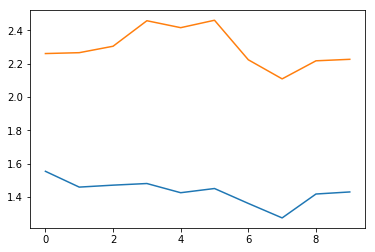

In [13]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(recompute_r)
ax.plot(recompute_r3d)

In [14]:
tbl = Table.read('/home/michele/sim/analysis/ng_ana/data_pd/mb.69002_p300_a800_r600_s5.fits')

In [15]:
tbl_ssam = Table.read('/home/michele/sim/analysis/ssam/m69p300/maps_data_v_w10_r200_n30.fits')

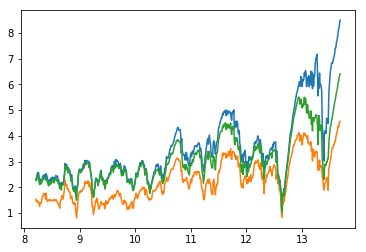

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(tbl['t'], tbl['r_eff'])
ax.plot(tbl['t'], tbl_ssam['r_eff_kpc3d'])
ax.plot(tbl['t'], tbl_ssam['n'])

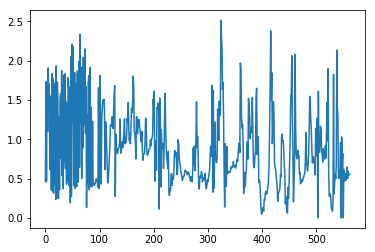

In [18]:
plt.plot(tbl_ssam['r_eff_kpc'])

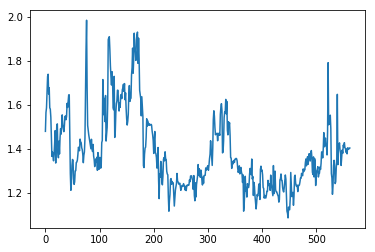

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(tbl_ssam['n']/tbl_ssam['r_eff_kpc3d'])

In [10]:
# snap = sim[80]
# pynbody.analysis.halo.center(snap.s)
# sideon(snap.s)
# pynbody.plot.sph.velocity_image(snap.g);

In [11]:
snap = sim[10]

In [12]:
pynbody.analysis.halo.center(snap.s)
sideon(snap.s)

In [13]:
pynbody.analysis.luminosity.half_light_r(snap[pynbody.filt.Sphere(50)].s, cylindrical=True)

SimArray(1.46756996, 'kpc')

In [14]:
pynbody.analysis.luminosity.half_light_r(snap[pynbody.filt.Sphere(11)].s, cylindrical=True)

SimArray(1.39967154, 'kpc')

In [24]:
test_r_eff_test = list()
for r in range(2,100, 2):
    subsnap = snap[pynbody.filt.Sphere(r)]
    test_r_eff_test.append(pynbody.analysis.luminosity.half_light_r(subsnap.s))
    

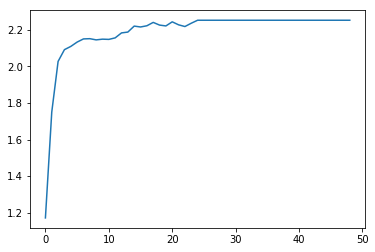

In [18]:
plt.plot(test_r_eff_test)

In [19]:
%timeit pynbody.analysis.luminosity.half_light_r(subsnap.s)

37.2 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit pynbody.analysis.luminosity.half_light_r(subsnap)

483 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
pynbody.analysis.luminosity.half_light_r(subsnap), pynbody.analysis.luminosity.half_light_r(subsnap.s)

(SimArray(2.2517792, 'kpc'), SimArray(2.2517792, 'kpc'))

In [22]:
subsnap

<SimSnap "/home/michele/sim/MySimulations/ng/mb.69002_p300_a800_r600/out/snapshot_0011:sphere" len=560829>

In [23]:
%timeit pynbody.analysis.luminosity.halo_mag(subsnap.s)

2.92 ms ± 267 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
recompute_r1 = list()
recompute_r3d1 = list()
for snap in tqdm.tqdm(sim):
    sideon(snap.s)
    subsnap = snap.s[pynbody.filt.Sphere(50)]
    recompute_r3d1.append(pynbody.analysis.luminosity.half_light_r(subsnap.s))
    recompute_r1.append(pynbody.analysis.luminosity.half_light_r(subsnap.s, cylindrical=True))

100%|██████████| 10/10 [00:03<00:00,  2.76it/s]


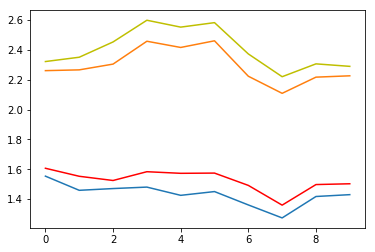

In [24]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(recompute_r)
ax.plot(recompute_r3d)
ax.plot(recompute_r1, 'r')
ax.plot(recompute_r3d1, 'y')

(0, 3)

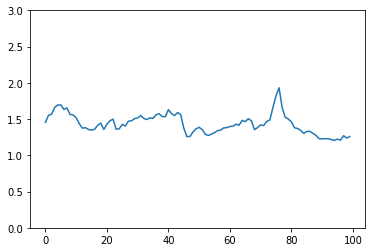

In [38]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.array(recompute_r3d)/np.array(recompute_r))
ax.set_ylim(0,3)